# Planet Collision

Numerically solve differential equations by approximating constant acceleration.

Plots position of two planet's CM drawn towards eachother by gravity.

### INPUT: Initial Conditions

Input initial conditions (position/velocity coordinates) into appropriate spaces below:

In [9]:
init_pos1 = 4.0/3.0
init_vel1 = 0
init_pos2 = -2.0/3.0
init_vel2 = 0

### Dependency Declarations

In [30]:
import sys
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

### Function Definitions

In [5]:
def compstep(coords, dt):
    # Updates coordinates given current coordinates
    # coords = [x, v, a], dt = small time interval
    coords[0] = coords[0] + (coords[1] * dt) + (coords[2] * dt * dt / 2)
    coords[1] = coords[1] + (coords[2] * dt)
    return coords;

def gravity(coords1, coords2):
    # Updates acceleration given current coordinates of both planets
    # coords = [x, v, a], dt = small time interval
    c = 1.5266418e-6  # Gravitational Constant with masses
    coords1[2] = -c/(coords1[0] - coords2[0])**2
    coords2[2] = c/(2*(coords1[0] - coords2[0])**2)
    
    return coords1, coords2    

### Driver

In [26]:
time = [0]
dt = 0.001

coord1 = [init_pos1, init_vel1, 0]
coord2 = [init_pos2, init_vel2, 0]

coord1, coord2 = gravity(coord1, coord2)

x1 = [init_pos1]
x2 = [init_pos2]

while(abs(coord1[0]-coord2[0]) > 0.01):
    coord1 = compstep(coord1, dt)
    coord2 = compstep(coord2, dt)
    x1.append(coord1[0])
    x2.append(coord2[0])
    coord1, coord2 = gravity(coord1, coord2)
    
    time.append(time[-1]+dt)

### Plot Output

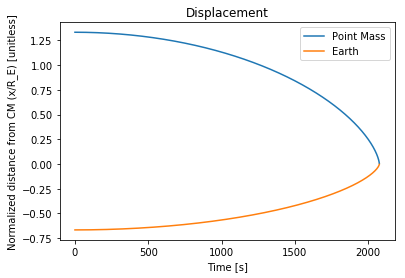

In [27]:
    plt.figure()
    plt.plot(time, x1, label="Point Mass")
    plt.plot(time, x2, label="Earth")
    plt.title('Displacement')
    plt.xlabel('Time [s]')
    plt.ylabel('Normalized distance from CM (x/R_E) [unitless]')
    plt.legend()

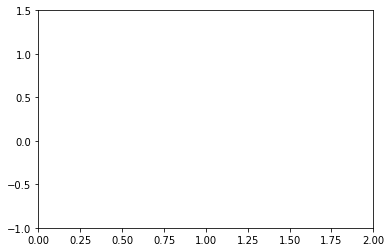

In [37]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-1, 1.5))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


In [38]:
plt.show()